In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from catboost import Pool

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
fulfilment_center = pd.read_csv('datasets/fulfilment_center_info.csv')
meal_info = pd.read_csv('datasets/meal_info.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [5]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [6]:
fulfilment_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [7]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [8]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
meal_id     51 non-null int64
category    51 non-null object
cuisine     51 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [9]:
train = pd.merge(train,fulfilment_center, on='center_id')
test = pd.merge(test,fulfilment_center, on='center_id')

train = pd.merge(train,meal_info, on='meal_id')
test = pd.merge(test,meal_info, on='meal_id')

In [10]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
category                 456548 non-null object
cuisine                  456548 non-null object
dtypes: float64(3), int64(9), object(3)
memory usage: 55.7+ MB


In [12]:
pp.ProfileReport(train)

Number of variables,15
Number of observations,456548
Total Missing (%),0.0%
Total size in memory,55.7 MiB
Average record size in memory,128.0 B
Numeric,9
Categorical,3
Boolean,2
Date,0
Text (Unique),0
Rejected,1


#### EDA

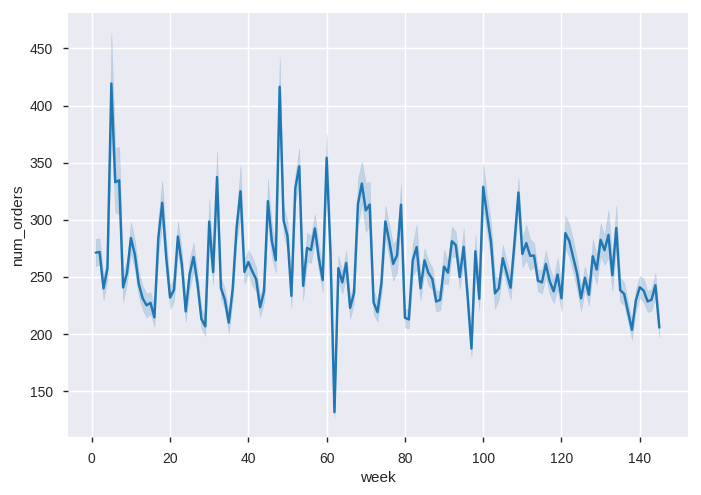

In [13]:
sns.lineplot(train['week'],train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

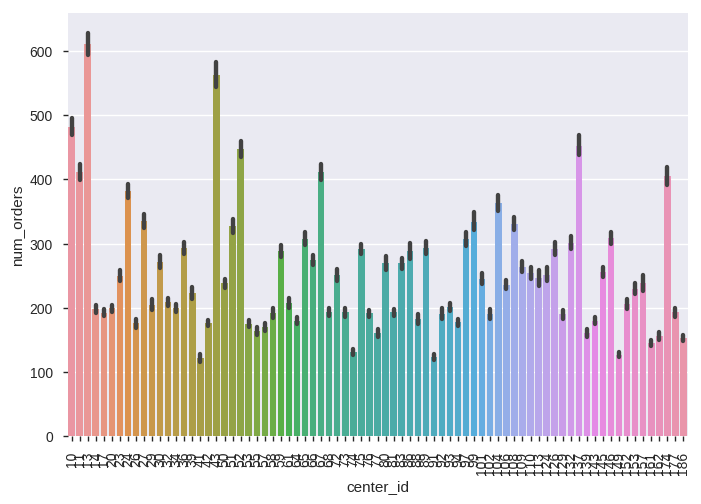

In [14]:
sns.barplot(train['center_id'],train['num_orders'])
plt.xticks(rotation=90)

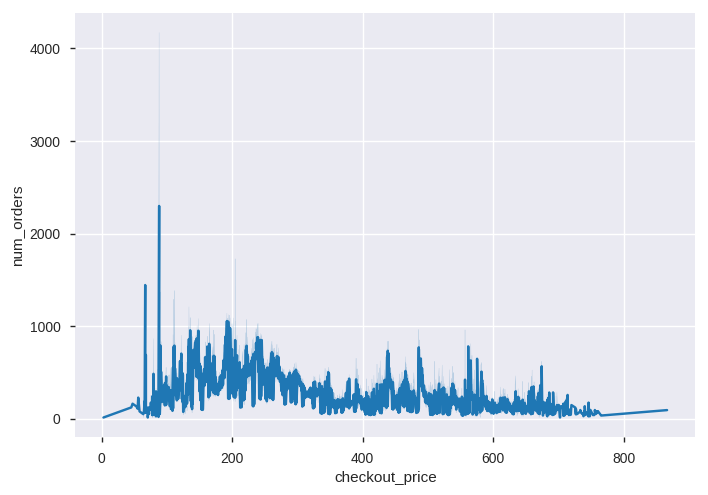

In [15]:
sns.lineplot(train['checkout_price'],train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

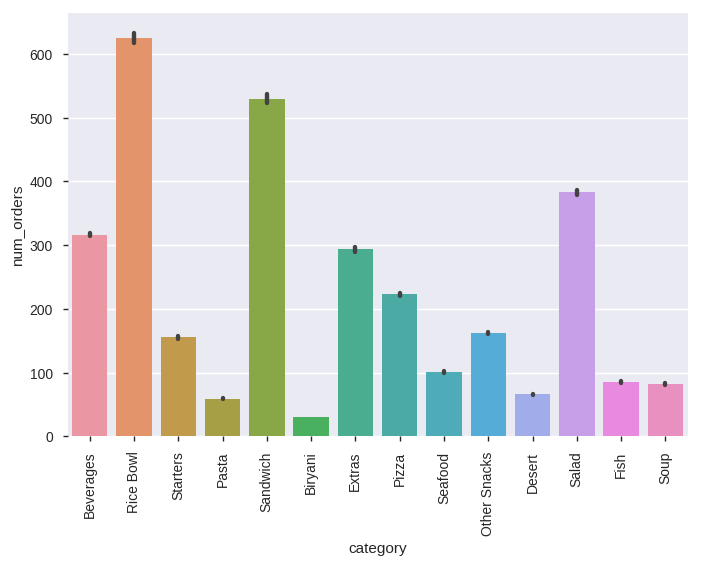

In [16]:
sns.barplot(train['category'],train['num_orders'])
plt.xticks(rotation = '90')

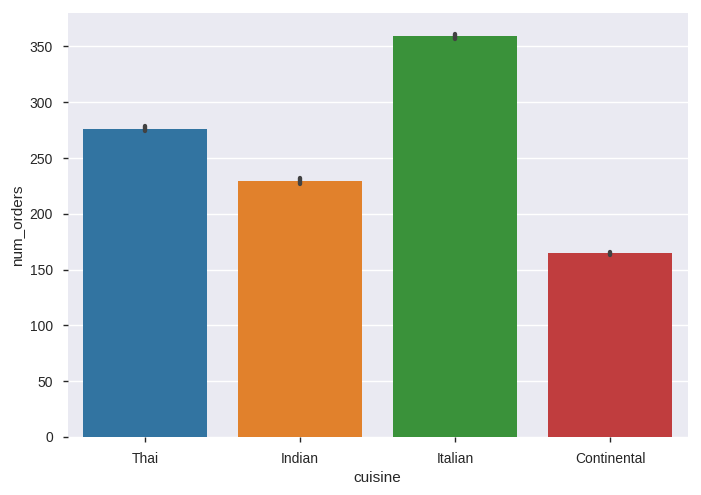

In [17]:
sns.barplot(train['cuisine'],train['num_orders'])
#plt.xticks(rotation = '90')

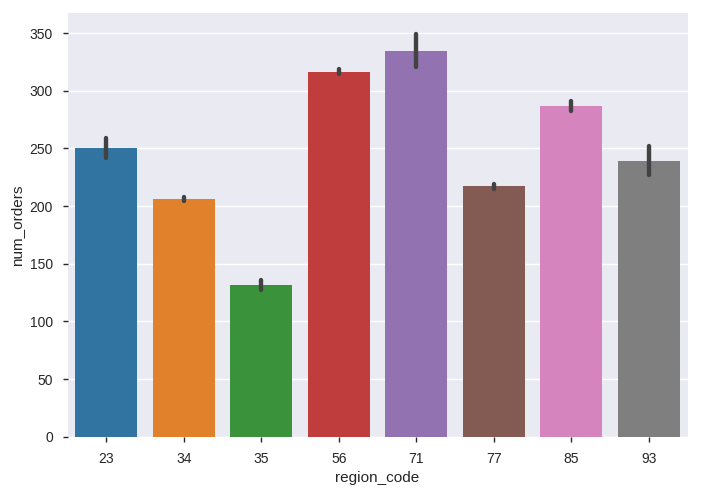

In [18]:
sns.barplot(train['region_code'],train['num_orders'])
#plt.xticks(rotation = '90')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

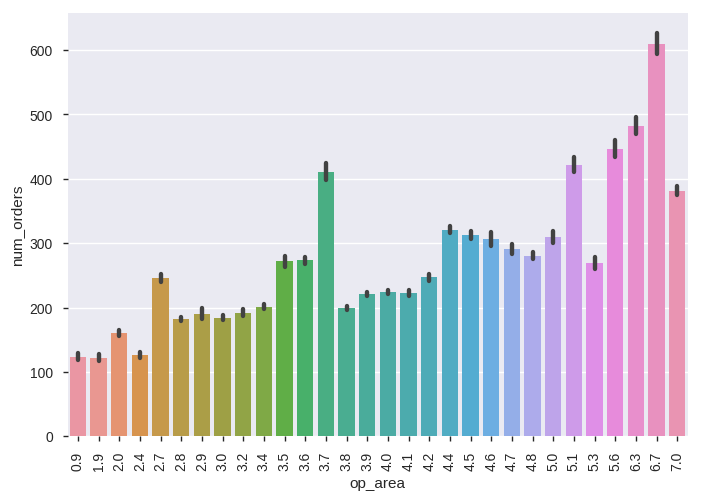

In [19]:
sns.barplot(train['op_area'],train['num_orders'])
plt.xticks(rotation = '90')

(array([400., 450., 500., 550., 600., 650., 700., 750.]),
 <a list of 8 Text xticklabel objects>)

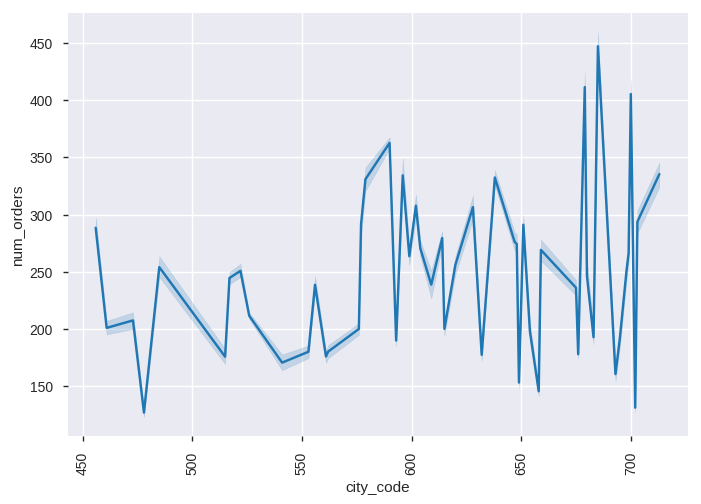

In [20]:
sns.lineplot(train['city_code'],train['num_orders'])
plt.xticks(rotation = '90')

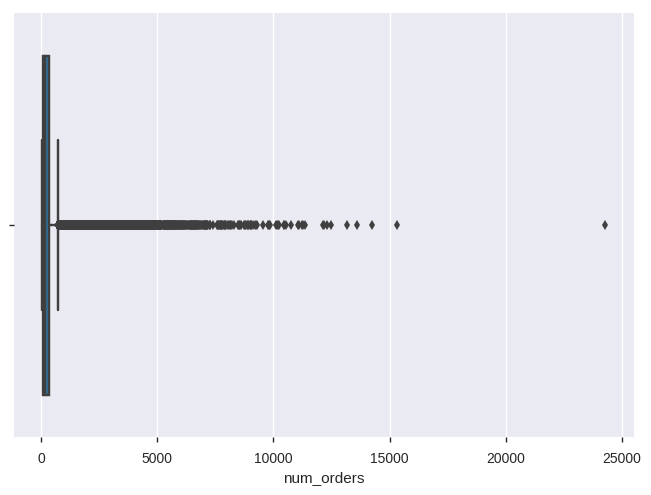

In [21]:
sns.boxplot(x='num_orders',data=train)

We need to removed outlier from num_orders 

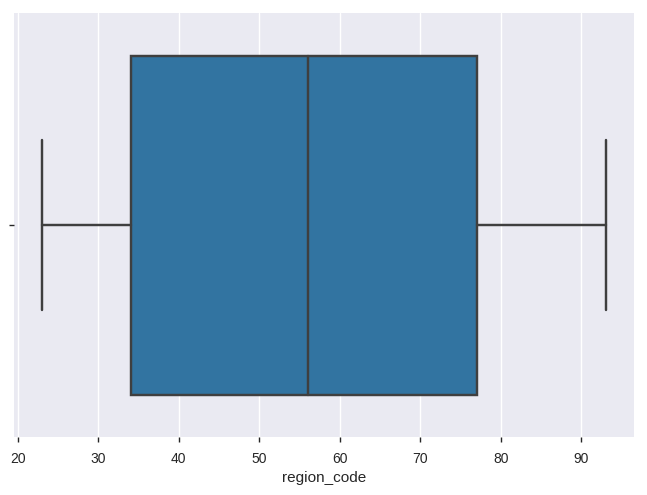

In [22]:
sns.boxplot(x='region_code',data=train)

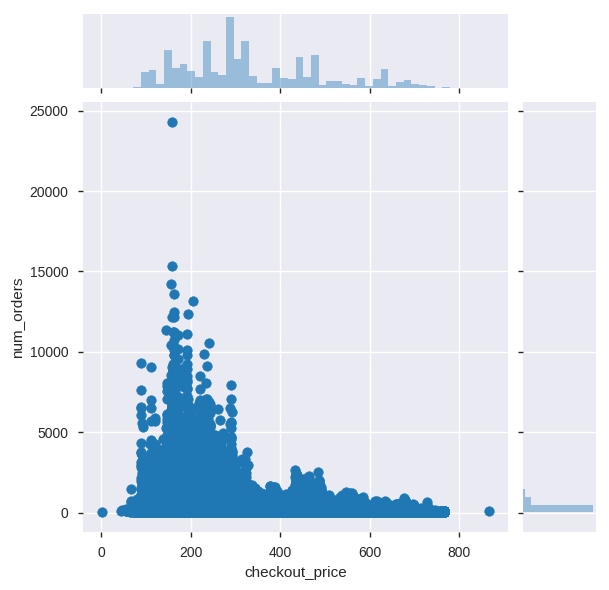

In [23]:
sns.jointplot(x='checkout_price',y='num_orders',data=train)

We have removed outlier from check_out price and base price

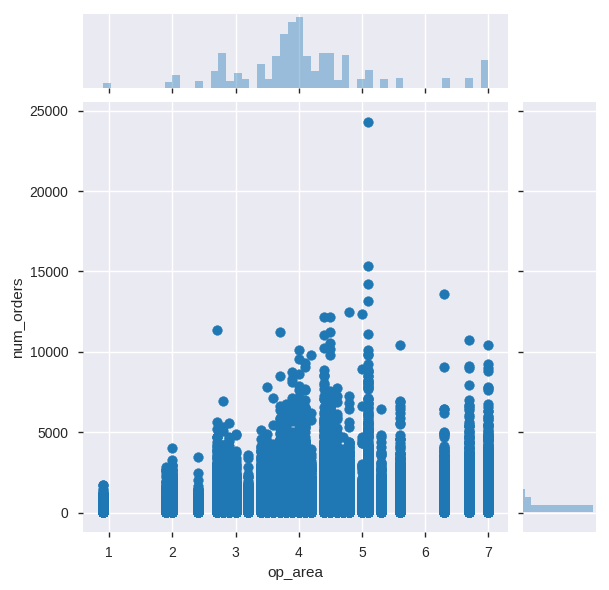

In [24]:
sns.jointplot(x='op_area',y='num_orders',data=train)

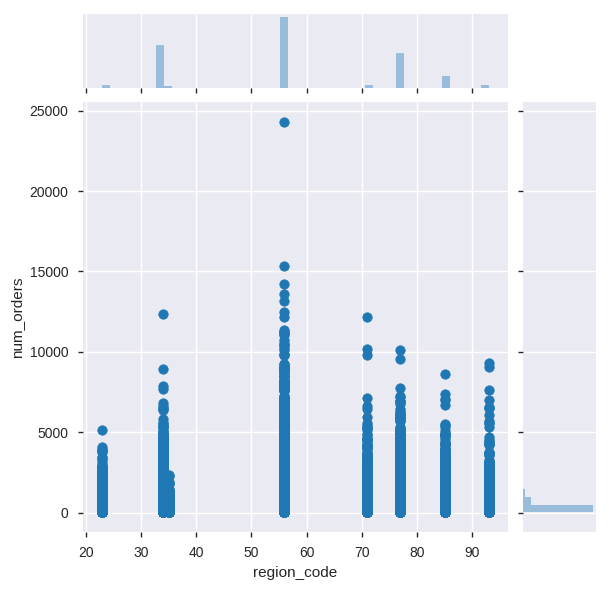

In [25]:
sns.jointplot(x='region_code',y='num_orders',data=train)

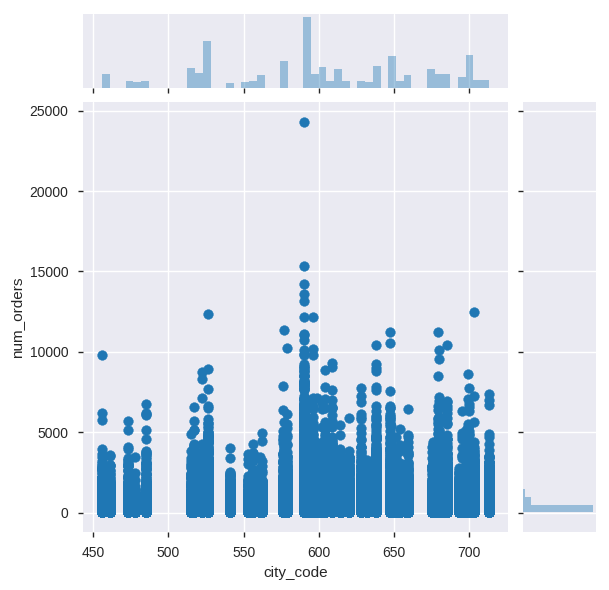

In [26]:
sns.jointplot(x='city_code',y='num_orders',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

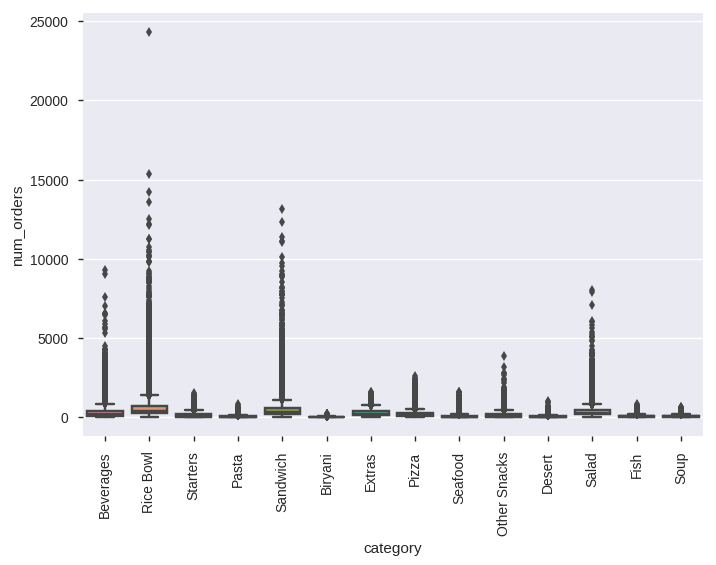

In [27]:
sns.boxplot(x='category',y='num_orders',data=train)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

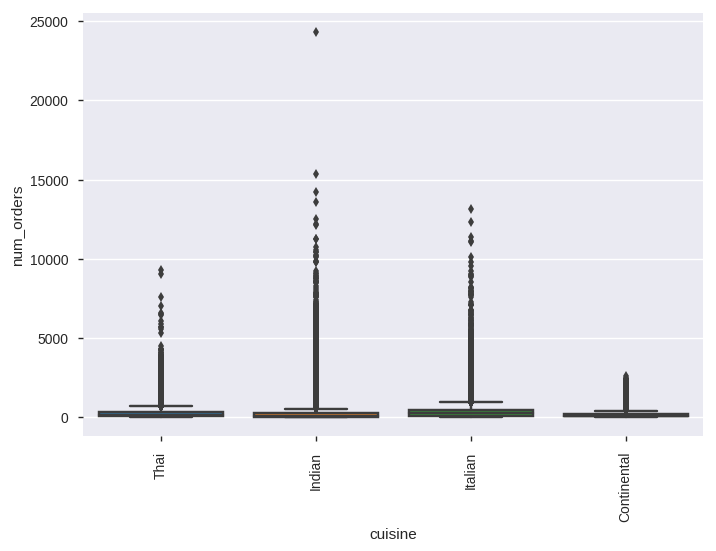

In [28]:
sns.boxplot(x='cuisine',y='num_orders',data=train)
plt.xticks(rotation=90)

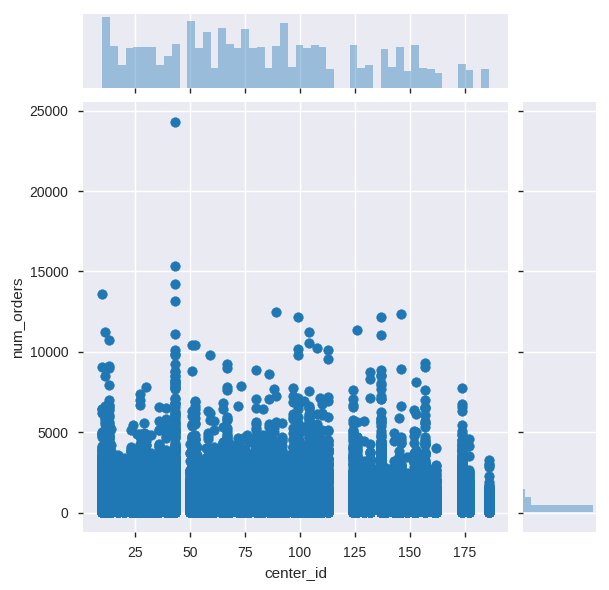

In [29]:
sns.jointplot(x='center_id',y='num_orders',data=train)

In [30]:
print("Total number of centers : ",train['center_id'].nunique())

Total number of centers :  77


In [31]:
print("Total Number of cities: ",train['city_code'].nunique())

Total Number of cities:  51


We have 77 stores in 51 cities, so some city have more than 1 center.

In [32]:
print("Total Number of cities: ",train['city_code'].nunique())

Total Number of cities:  51


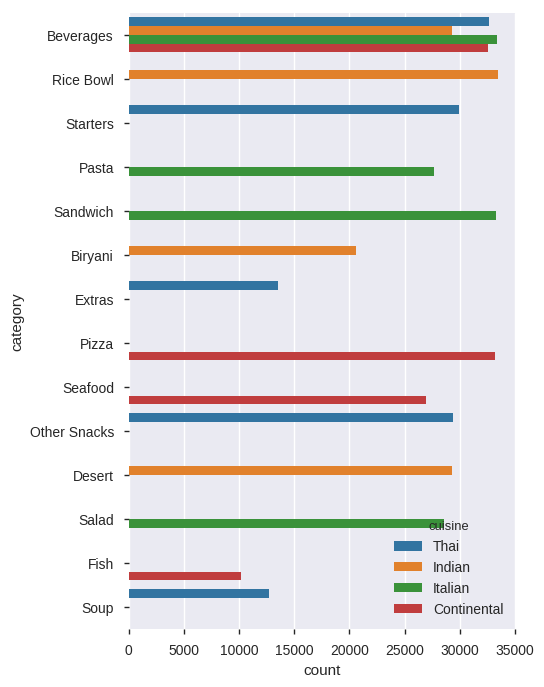

In [33]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = train['category'], hue = train['cuisine'], ax=ax)
plt.show()

In [34]:
center_meal_train = (train['center_id'].astype(str) + "_" + train['meal_id'].astype(str)).unique()
print("There are", len(center_meal_train),"center-meal pairs in train data")

There are 3597 center-meal pairs in train data


In [35]:
center_meal_test = (test['center_id'].astype(str) + "_" + test['meal_id'].astype(str)).unique()
print("There are", len(center_meal_test),"center-meal pairs in train data")

There are 3548 center-meal pairs in train data


In [36]:
# check if test set has any new center-mean pair or not
print("There are",len(set(center_meal_test) - set(center_meal_train)),"New center-meal pairs in test dataset which are not present in train dataset")
print(set(center_meal_test) - set(center_meal_train))

There are 3 New center-meal pairs in test dataset which are not present in train dataset
{'73_2956', '92_2104', '73_1571'}


In [37]:
test[(test['center_id']==73) & (test['meal_id'].isin([2956, 1571]))].shape[0]

11

In [38]:
test[(test['center_id']==92) & (test['meal_id'].isin([2104]))].shape[0]

2

There should be 77*51 = 3927 center-meal pair, but we have 3597 pairs in train data, that means some centers did not sell some of the meals.

There should be 3597*145 = 521565 records in past 145 week data, but we have 456548 records. which means some centers did not sell some meal for some week or they stared selling some new type of meal after some weeks. Same with test data.

Test set has only 3548 center-meal pair, that means some of the centers did not sell some type of meals in this 10 week.

Here in the test set (future 10 week), center 73 started selling meal 2956 & 1571, center 92 started selling meal 2104, which they have never sold in last 145 weeks. There are only 13 records with unknown center-meal pair in test set.

#### Remove outlier

In [39]:
outlier_index = train[(train['num_orders']>15000)].index

In [40]:
train.drop(outlier_index,inplace = True)

#### Feature Engineering

In [41]:
train['train_or_test'] = 'train'
test['train_or_test'] = 'test'

In [42]:
train['num_orders'] = np.log1p(train['num_orders'])

In [43]:
total_data = train.append(test).reset_index(drop=True)[train.columns]

/home/yash/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/pandas/core/frame.py:6701: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [44]:
total_data = total_data.sort_values(['center_id', 'meal_id', 'week']).reset_index(drop=True)

In [46]:
total_data['checkout_price'] = np.log1p(total_data['checkout_price'])
total_data['base_price'] = np.log1p(total_data['base_price'])

In [47]:
total_data['discount_on_base'] = (total_data['base_price'] - total_data['checkout_price']) / total_data['base_price']

In [48]:
total_data["discount_ratio"] = total_data["base_price"] / total_data["checkout_price"]

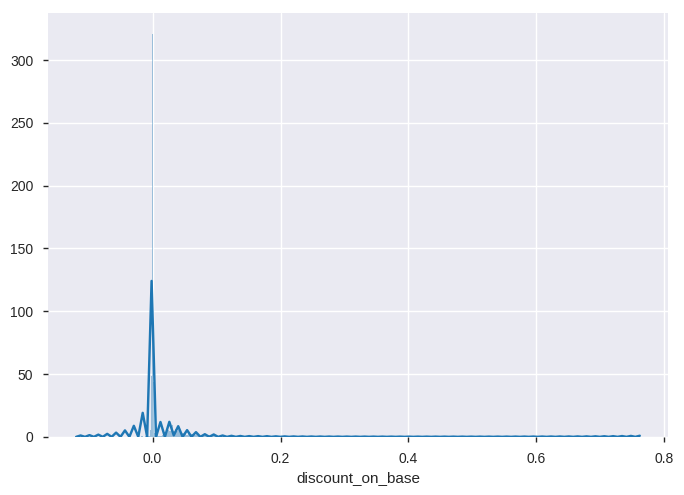

In [49]:
sns.distplot(total_data['discount_on_base'], bins=500)
plt.show()

In [50]:
total_data['price_last_curr_diff'] = (total_data['checkout_price'].shift(1) - total_data['checkout_price']).fillna(1)/ total_data['checkout_price'].shift(1).fillna(1)

In [53]:
for _, r in total_data.groupby(['center_id', 'meal_id'])['week'].first().reset_index().iterrows():
    total_data.loc[(total_data['center_id']==r['center_id']) & (total_data['meal_id']==r['meal_id']) & (total_data['week']==r['week']), 'price_last_curr_diff'] = total_data[(total_data['center_id']==r['center_id']) & (total_data['meal_id']==r['meal_id']) & (total_data['week']!=r['week'])]['price_last_curr_diff'].mean()
total_data['price_last_curr_diff'] = total_data['price_last_curr_diff'].fillna(0)

#### Some functions to create aggregated, rolling mean/median, and exponentially weighted features.

Code from : https://www.kaggle.com/abhilashawasthi/feature-engineering-lgb-model

In [52]:
# Features constructed from previous sales values

#Creating sales lag features
def create_sales_lag_feats(df, gpby_cols, target_col, lags):
    gpby = df.groupby(gpby_cols)
    for i in lags:
        df['_'.join([target_col, 'lag', str(i)])] = \
                gpby[target_col].shift(i).values + np.random.normal(scale=1.6, size=(len(df),))
    return df

# Creating sales exponentially weighted mean features
def create_sales_ewm_feats(df, gpby_cols, target_col, alpha=[0.9], shift=[1]):
    gpby = df.groupby(gpby_cols)
    for a in alpha:
        for s in shift:
            df['_'.join([target_col, 'lag', str(s), 'ewm', str(a)])] = \
                gpby[target_col].shift(s).ewm(alpha=a).mean().values
    return df

In [54]:
# Creating num_orders lag, rolling mean, rolling median, ohe features of the above train set
total_data = create_sales_lag_feats(total_data, gpby_cols=['center_id','meal_id'], target_col='num_orders', 
                               lags=[10,11, 12])

total_data = create_sales_ewm_feats(total_data, gpby_cols=['center_id','meal_id'], 
                               target_col='num_orders', 
                               alpha=[0.5], 
                               shift=[10,11,12,13,14,15])

In [55]:
total_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,price_last_curr_diff,num_orders_lag_10,num_orders_lag_11,num_orders_lag_12,num_orders_lag_10_ewm_0.5,num_orders_lag_11_ewm_0.5,num_orders_lag_12_ewm_0.5,num_orders_lag_13_ewm_0.5,num_orders_lag_14_ewm_0.5,num_orders_lag_15_ewm_0.5
0,1436842,1,10,1062,5.206147,5.206147,0,0,6.763885,590,...,0.000086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1205013,2,10,1062,5.216890,5.211451,0,0,6.663133,590,...,-0.002064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1447751,3,10,1062,5.222300,5.211451,0,0,6.747587,590,...,-0.001037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1014968,4,10,1062,5.211451,5.216890,0,0,7.092574,590,...,0.002077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003563,5,10,1062,5.217053,5.206147,0,0,6.865891,590,...,-0.001075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
### Center count features ###
gdf = total_data.groupby(["center_id", "week"])["id"].agg(['size']).reset_index()
gdf.columns = ["center_id", "week", "center_week_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "week"], how="left")

gdf = total_data.groupby(["center_id", "category"])["id"].count().reset_index()
gdf.columns = ["center_id", "category", "center_cat_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "category"], how="left")

gdf = total_data.groupby(["center_id", "category", "week"])["id"].count().reset_index()
gdf.columns = ["center_id", "category", "week", "center_cat_week_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "category", "week"], how="left")

gdf = total_data.groupby(["center_id", "cuisine"])["id"].count().reset_index()
gdf.columns = ["center_id", "cuisine", "center_cui_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "cuisine"], how="left")

In [57]:
### Meal count features ###
gdf = total_data.groupby(["meal_id"])["id"].count().reset_index()
gdf.columns = ["meal_id", "meal_count"]
total_data = pd.merge(total_data,gdf, on=["meal_id"], how="left")

gdf = total_data.groupby(["region_code", "meal_id"])["id"].count().reset_index()
gdf.columns = ["region_code", "meal_id", "region_meal_count"]
total_data= pd.merge(total_data,gdf, on=["region_code", "meal_id"], how="left")

gdf = total_data.groupby(["meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["meal_id", "week", "meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["meal_id", "week"], how="left")

gdf =total_data.groupby(["center_type", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["center_type", "meal_id", "week", "type_meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["center_type", "meal_id", "week"], how="left")

gdf = total_data.groupby(["region_code", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["region_code", "meal_id", "week", "region_meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["region_code", "meal_id", "week"], how="left")

gdf =total_data.groupby(["city_code", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["city_code", "meal_id", "week", "city_meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["city_code", "meal_id", "week"], how="left")

In [58]:
### Price rank ###
total_data["meal_price_rank"] = total_data.groupby("meal_id")["checkout_price"].rank()
total_data["meal_city_price_rank"] =total_data.groupby(["meal_id", "city_code"])["checkout_price"].rank()
total_data["meal_region_price_rank"] = total_data.groupby(["meal_id", "region_code"])["checkout_price"].rank()
total_data["meal_week_price_rank"] = total_data.groupby(["meal_id", "week"])["checkout_price"].rank()

total_data["center_price_rank"] = total_data.groupby("center_id")["checkout_price"].rank()
total_data["center_week_price_rank"] = total_data.groupby(["center_id", "week"])["checkout_price"].rank()
total_data["center_cat_price_rank"] = total_data.groupby(["center_id", "category"])["checkout_price"].rank()

In [59]:
### Week features ###
gdf = total_data.groupby(["meal_id"])["checkout_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["meal_id", "meal_price_min", "meal_price_max", "meal_price_mean", "meal_price_std"]
total_data = pd.merge(total_data,gdf, on=["meal_id"], how="left")

gdf = total_data.groupby(["meal_id"])["base_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["meal_id", "disc_price_min", "disc_price_max", "disc_price_mean", "disc_price_std"]
total_data = pd.merge(total_data,gdf, on=["meal_id"], how="left")

gdf = total_data.groupby(["city_code","meal_id", "week"])["checkout_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["city_code", "meal_id", "week", "meal_price2_min", "meal_price2_max", "meal_price2_mean", "meal_price2_std"]
total_data= pd.merge(total_data,gdf, on=["city_code", "meal_id", "week"], how="left")

gdf = total_data.groupby(["city_code", "category"])["checkout_price"].agg(["mean", "std"]).reset_index()
gdf.columns = ["city_code", "category", "meal_price3_mean", "meal_price3_std"]
total_datal = pd.merge(total_data,gdf, on=["city_code", "category"], how="left")

In [60]:
total_data['center_id'] = total_data['center_id'].astype(np.object)
total_data['meal_id'] = total_data['meal_id'].astype(np.object)
total_data['region_code'] = total_data['region_code'].astype(np.object)
total_datal['city_code'] = total_data['city_code'].astype(np.object)

In [61]:
train_data = total_data.loc[total_data['train_or_test']=='train', :]
test_data = total_data.loc[total_data['train_or_test']=='test', :]

In [62]:
center_meal_mean = train_data.groupby(['center_id','meal_id'])['num_orders'].mean()
center_meal_mean = center_meal_mean.reset_index()
center_meal_mean = center_meal_mean.rename(columns={'num_orders':'avg_orders'})
train_data = pd.merge(train_data,center_meal_mean, how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
test_data = pd.merge(test_data,center_meal_mean, how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
center_mean = train_data.groupby('center_id')['num_orders'].mean()
center_mean = center_mean.reset_index()
center_mean = center_mean.rename(columns={'num_orders':'avg_center'})
train_data = pd.merge(train_data,center_mean, how='left', left_on=['center_id'], right_on = ['center_id'])
test_data = pd.merge(test_data,center_mean, how='left', left_on=['center_id'], right_on = ['center_id'])
meal_mean = train_data.groupby('meal_id')['num_orders'].mean()
meal_mean = meal_mean.reset_index()
meal_mean = meal_mean.rename(columns={'num_orders':'avg_meal'})
train_data = pd.merge(train_data, meal_mean,how='left',left_on=['meal_id'], right_on = ['meal_id'])
test_data = pd.merge(test_data, meal_mean,how='left',left_on=['meal_id'], right_on = ['meal_id'])

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456546 entries, 0 to 456545
Data columns (total 60 columns):
id                           456546 non-null int64
week                         456546 non-null int64
center_id                    456546 non-null object
meal_id                      456546 non-null object
checkout_price               456546 non-null float64
base_price                   456546 non-null float64
emailer_for_promotion        456546 non-null int64
homepage_featured            456546 non-null int64
num_orders                   456546 non-null float64
city_code                    456546 non-null int64
region_code                  456546 non-null object
center_type                  456546 non-null object
op_area                      456546 non-null float64
category                     456546 non-null object
cuisine                      456546 non-null object
train_or_test                456546 non-null object
discount_on_base             456546 non-null float64
disco

In [64]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 60 columns):
id                           32573 non-null int64
week                         32573 non-null int64
center_id                    32573 non-null object
meal_id                      32573 non-null object
checkout_price               32573 non-null float64
base_price                   32573 non-null float64
emailer_for_promotion        32573 non-null int64
homepage_featured            32573 non-null int64
num_orders                   0 non-null float64
city_code                    32573 non-null int64
region_code                  32573 non-null object
center_type                  32573 non-null object
op_area                      32573 non-null float64
category                     32573 non-null object
cuisine                      32573 non-null object
train_or_test                32573 non-null object
discount_on_base             32573 non-null float64
discount_ratio              

### Catboost Model

In [65]:
avoid_column = ['id', 'num_orders', 'train_or_test']

In [66]:
features = [col for col in test_data.columns if col not in avoid_column]

In [67]:
features

['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category',
 'cuisine',
 'discount_on_base',
 'discount_ratio',
 'price_last_curr_diff',
 'num_orders_lag_10',
 'num_orders_lag_11',
 'num_orders_lag_12',
 'num_orders_lag_10_ewm_0.5',
 'num_orders_lag_11_ewm_0.5',
 'num_orders_lag_12_ewm_0.5',
 'num_orders_lag_13_ewm_0.5',
 'num_orders_lag_14_ewm_0.5',
 'num_orders_lag_15_ewm_0.5',
 'center_week_count',
 'center_cat_count',
 'center_cat_week_count',
 'center_cui_count',
 'meal_count',
 'region_meal_count',
 'meal_week_count',
 'type_meal_week_count',
 'region_meal_week_count',
 'city_meal_week_count',
 'meal_price_rank',
 'meal_city_price_rank',
 'meal_region_price_rank',
 'meal_week_price_rank',
 'center_price_rank',
 'center_week_price_rank',
 'center_cat_price_rank',
 'meal_price_min',
 'meal_price_max',
 'meal_price_mean',
 'meal_price_std',
 'disc_price_min

In [68]:
categorical_features_indices = np.where(train_data[features].dtypes =='object')[0]
categorical_features_indices

array([ 1,  2,  8,  9, 11, 12])

In [73]:
model = CatBoostRegressor(
    iterations=2000, 
    learning_rate=0.02, 
    max_depth=8, 
    l2_leaf_reg=10, 
    loss_function='RMSE',
    random_seed=2019,
    od_type='Iter',
    od_wait=25,
    verbose=100,
    use_best_model=True
    )

In [70]:
errcb=[]
y_pred_test=[]

fold = KFold(n_splits=5,shuffle=True,random_state=2019)

for train_index, test_index in fold.split(train_data[features],train_data['num_orders']):
    X_train, X_valid =train_data[features].iloc[train_index], train_data[features].iloc[test_index]
    y_train, y_valid = train_data['num_orders'][train_index],train_data['num_orders'][test_index]
    model.fit(X_train,y_train,
              cat_features = categorical_features_indices,
              eval_set=(X_valid,y_valid),
              early_stopping_rounds=300,
              verbose=100)
    preds = model.predict(X_valid)
    print("err: ",np.sqrt(mean_squared_error(y_valid,preds)))
    errcb.append(np.sqrt(mean_squared_error(y_valid,preds)))
    p = model.predict(test_data[features])
    y_pred_test.append(p)

0:	learn: 4.9367785	test: 4.9318178	best: 4.9318178 (0)	total: 310ms	remaining: 10m 20s
100:	learn: 0.8504234	test: 0.8502717	best: 0.8502717 (100)	total: 18.5s	remaining: 5m 47s
200:	learn: 0.5108346	test: 0.5130618	best: 0.5130618 (200)	total: 36.8s	remaining: 5m 29s
300:	learn: 0.4909706	test: 0.4937387	best: 0.4937387 (300)	total: 55s	remaining: 5m 10s
400:	learn: 0.4834857	test: 0.4866489	best: 0.4866489 (400)	total: 1m 13s	remaining: 4m 52s
500:	learn: 0.4782842	test: 0.4818490	best: 0.4818490 (500)	total: 1m 31s	remaining: 4m 33s
600:	learn: 0.4742090	test: 0.4781601	best: 0.4781601 (600)	total: 1m 49s	remaining: 4m 14s
700:	learn: 0.4707905	test: 0.4750945	best: 0.4750945 (700)	total: 2m 7s	remaining: 3m 56s
800:	learn: 0.4676958	test: 0.4723810	best: 0.4723810 (800)	total: 2m 26s	remaining: 3m 38s
900:	learn: 0.4650924	test: 0.4701571	best: 0.4701571 (900)	total: 2m 44s	remaining: 3m 21s
1000:	learn: 0.4627978	test: 0.4682380	best: 0.4682380 (1000)	total: 3m 3s	remaining: 3m 2

In [200]:
model.fit(X=train_data[features], y=train_data['num_orders'], cat_features=categorical_features_indices, verbose=100)

0:	learn: 4.9355914	total: 234ms	remaining: 7m 47s
100:	learn: 0.8480548	total: 23.5s	remaining: 7m 21s
200:	learn: 0.5103168	total: 46.5s	remaining: 6m 55s
300:	learn: 0.4907152	total: 1m 10s	remaining: 6m 37s
400:	learn: 0.4834669	total: 1m 34s	remaining: 6m 16s
500:	learn: 0.4781310	total: 1m 57s	remaining: 5m 52s
600:	learn: 0.4741687	total: 2m 22s	remaining: 5m 31s
700:	learn: 0.4709351	total: 2m 51s	remaining: 5m 18s
800:	learn: 0.4680599	total: 3m 22s	remaining: 5m 2s
900:	learn: 0.4655784	total: 3m 52s	remaining: 4m 44s
1000:	learn: 0.4633562	total: 4m 24s	remaining: 4m 24s
1100:	learn: 0.4614188	total: 4m 55s	remaining: 4m 1s
1200:	learn: 0.4595289	total: 5m 25s	remaining: 3m 36s
1300:	learn: 0.4579681	total: 5m 55s	remaining: 3m 10s
1400:	learn: 0.4565149	total: 6m 25s	remaining: 2m 44s
1500:	learn: 0.4551435	total: 6m 55s	remaining: 2m 18s
1600:	learn: 0.4538519	total: 7m 25s	remaining: 1m 50s
1700:	learn: 0.4526290	total: 7m 55s	remaining: 1m 23s
1800:	learn: 0.4514686	tota

In [201]:
pred = model.predict(test_data[features])

In [202]:
pred = (np.exp(pred) - 1)

In [203]:
submission = pd.DataFrame({'id':test['id'],'num_orders':pred})
submission = submission[['id','num_orders']]
submission.head()

,id,num_orders
0,1028232,995.578673
1,1262649,992.443147
2,1453211,1010.234980
3,1262599,763.315030
4,1495848,959.815124


In [204]:
submission.to_csv('catboost_1.csv', index=False)

In [71]:
feature_score = pd.DataFrame(list(zip(train_data[features].dtypes.index, model.get_feature_importance(Pool(train_data[features], label=train_data['num_orders'], cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

Dataset is provided, but PredictionValuesChange feature importance don't use it, since non-empty LeafWeights in model.


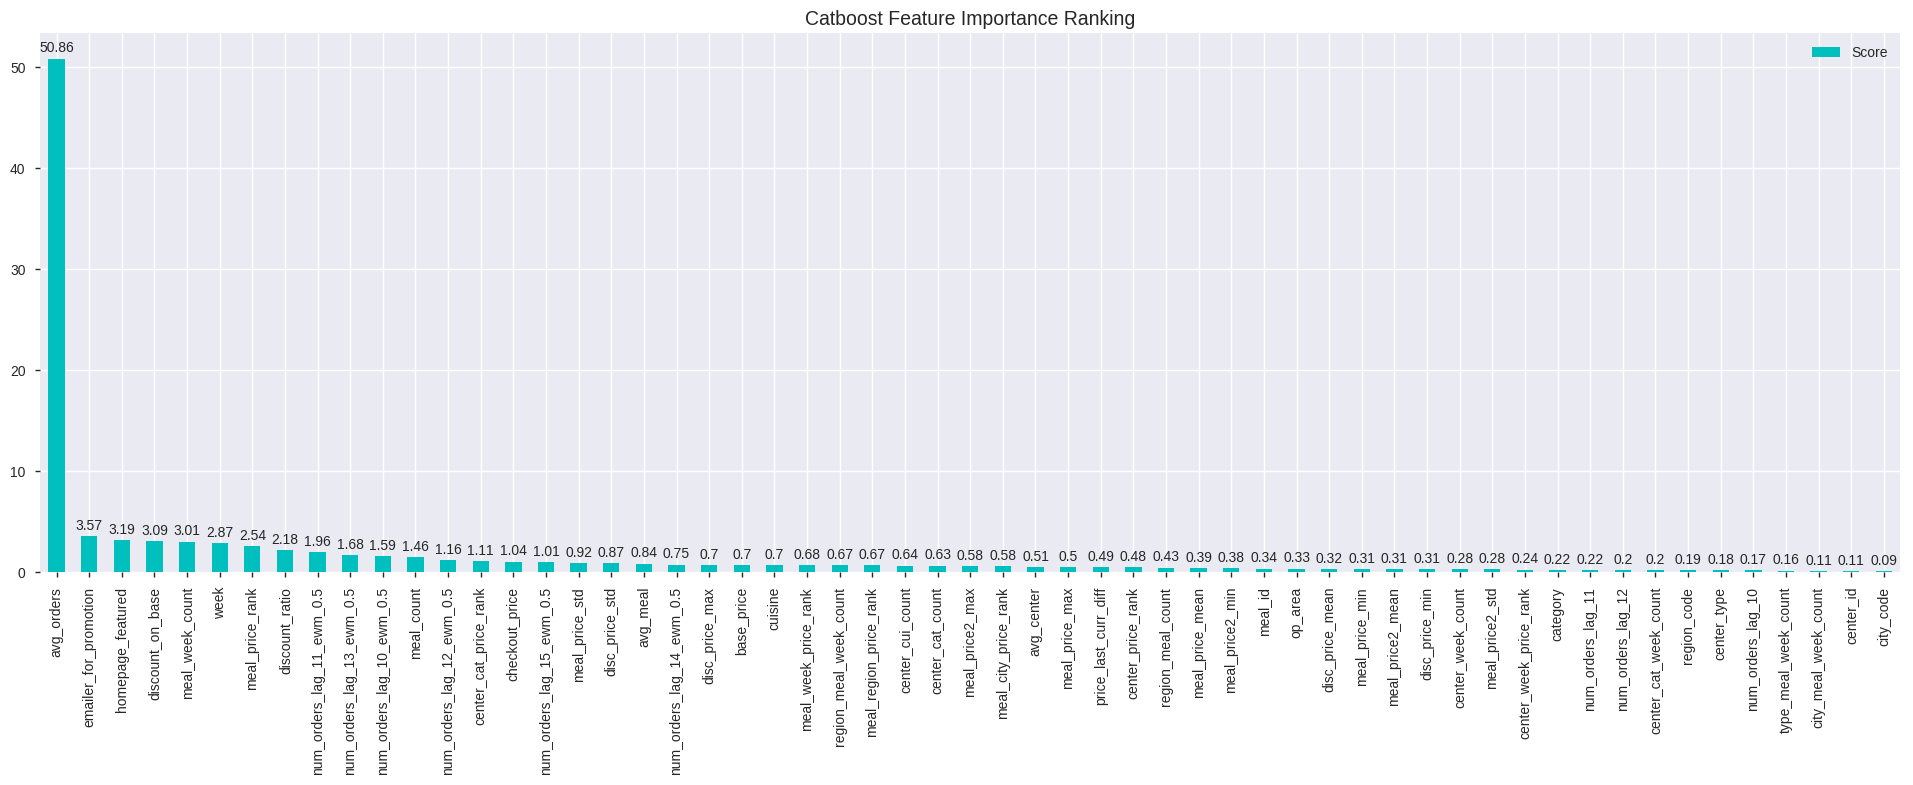

In [72]:
plt.rcParams["figure.figsize"] = (24,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()